# Analisis de información de BBDD de Skaters

In [1]:

# Importación librerías 
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt




In [2]:
# Preparación de conección a BBDD SQL
connection = pg.connect("host=localhost dbname=skatepark user=postgres password=242424")
df = psql.read_sql('SELECT * FROM skaters', connection)
product_category = psql.read_sql_query('select * FROM skaters', connection)

C:\Users\emers\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\emers\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
# Previsualición de DataFrame 
df.head()

,id,email,nombre,password,anos_experiencia,especialidad,foto,estado
0,13,ejemplo@ejemplo4.cl,nombre4,1234,3,outdoor,/public/fotos/sakert6.jpg,False
1,14,ejemplo@ejemplo5.cl,nombre5,1234,4,Downhill,/public/fotos/sakert8.jpg,False
2,16,ejemplo@ejemplo7.cl,nombre7,1234,1,Freestyle,/public/fotos/sakert5.jpg,False
3,17,ejemplo@ejemplo8.cl,nombre8,1234,3,Freestyle,/public/fotos/saker1.jpg,False
4,19,ejemplo@ejemplo10.cl,nombre10,242424,5,Freestyle,/public/fotos/saker1.jpg,False


In [4]:
# Preprocesamiento de DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                14 non-null     int64 
 1   email             14 non-null     object
 2   nombre            14 non-null     object
 3   password          14 non-null     object
 4   anos_experiencia  14 non-null     int64 
 5   especialidad      14 non-null     object
 6   foto              14 non-null     object
 7   estado            14 non-null     bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 926.0+ bytes


In [5]:
# Filtrado del DF
df1=df.drop(['password', 'email', 'foto'], axis=1)
df1.head()

,id,nombre,anos_experiencia,especialidad,estado
0,13,nombre4,3,outdoor,False
1,14,nombre5,4,Downhill,False
2,16,nombre7,1,Freestyle,False
3,17,nombre8,3,Freestyle,False
4,19,nombre10,5,Freestyle,False


## Gráfico 1: Especialidad de particpantes

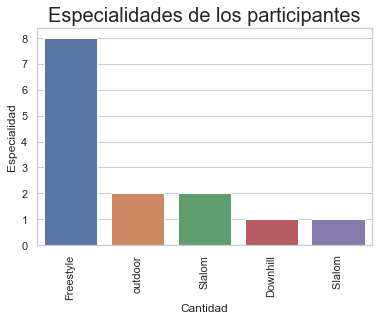

In [6]:

especialidades= df1['especialidad'].value_counts()

sns.set_theme(style="whitegrid")
sns.barplot( x=especialidades.index, y= especialidades.values);
plt.title("Especialidades de los participantes", fontsize=20)
plt.xticks( rotation=90);
plt.xlabel("Cantidad");
plt.ylabel("Especialidad");

In [7]:
df['estado'].value_counts()

False    7
True     7
Name: estado, dtype: int64

## Gráfico 2: Estado de participantes en plataforma

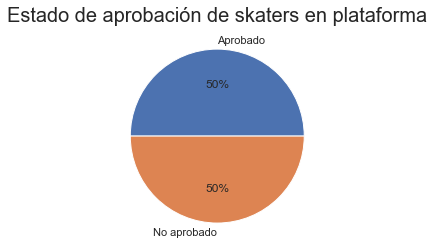

In [8]:
data= df1['estado'].value_counts()
labels=['Aprobado','No aprobado']
plt.pie(data, labels= labels, autopct='%.0f%%',)
plt.title("Estado de aprobación de skaters en plataforma", fontsize=20);

## Gráfico 3: Promedio de años de experiencia por especialidad

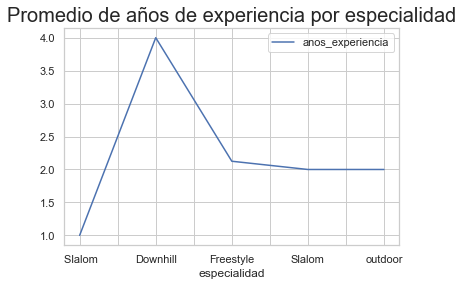

In [9]:
df2= df1.drop(['estado', 'id'], axis=1)
años_especialidad= df2.groupby(['especialidad']).mean()
años_especialidad.plot();
plt.title("Promedio de años de experiencia por especialidad", fontsize=20);
